# Import Library 

In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
plt.style.use("fivethirtyeight")
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = 90
%matplotlib inline

# Load Data

In [106]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Understanding 

In [56]:
train.dtypes["OverallCond"]

dtype('int64')

In [57]:
train["OverallQual"] =train["OverallQual"].astype("category")
train["OverallCond"] =train["OverallCond"].astype("category")
train["MSSubClass"] = train["MSSubClass"].astype("category")

In [60]:
train["MSSubClass"].dtypes

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180,
                  190],
                 ordered=False)

## Missing Value 

In [4]:
missing = train.isnull().sum()[train.isnull().sum() > 0]
missing

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Insights:
Looking at the data, turnsout some data is not actually missing. They null values read the 'na' categories as a missing value when it is supposed to be a part of the category

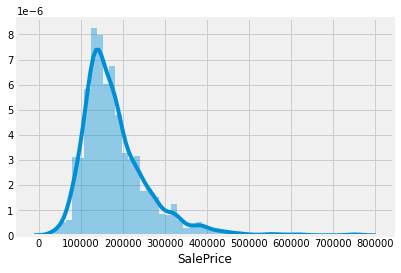

In [45]:
sns.distplot(train["SalePrice"])

# Handling Missing Value 

In [33]:
cols_unknown = ["Alley","BsmtQual","FireplaceQu","FireplaceQu","GarageType",
        "GarageFinish","GarageQual","GarageCond",
        "PoolQC","Fence","MiscFeature","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

In [31]:
cols_known = missing.index[~missing.index.isin(cols)]
cols_known

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [32]:
train_clean = train.copy()

In [36]:
train_clean[cols_unknown] = train_clean[cols_unknown].fillna("Unavailable")


In [39]:
missing = train_clean.isnull().sum()[train_clean.isnull().sum() > 0]
missing/len(train_clean) * 100

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64

In [49]:
train_clean["Electrical"] = train_clean["Electrical"].fillna(train["Electrical"].mode()[0])

In [50]:
train_clean["MasVnrType"] = train_clean["MasVnrType"].fillna(train["MasVnrType"].mode()[0])

In [51]:
missing = train_clean.isnull().sum()[train_clean.isnull().sum() > 0]
missing/len(train_clean) * 100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [59]:
train_clean.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [70]:
train_clean_numeric = train_clean.select_dtypes("int64","float64")

In [62]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_clean_numeric)
train_clean_impute = imputer.transform(train_clean_numeric)
train_clean_impute

array([[1.00000e+00, 6.00000e+01, 8.45000e+03, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 9.60000e+03, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 1.12500e+04, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 9.04200e+03, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 9.71700e+03, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 9.93700e+03, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [64]:
train_clean_numeric = train_clean_impute

In [87]:
num_attributes = train_clean_numeric.columns
cat_attributes = train.select_dtypes(include=["category","object"]).columns

In [102]:
def custom_preprocessing(df):
    cols_unknown = ["Alley","BsmtQual","FireplaceQu","FireplaceQu","GarageType",
        "GarageFinish","GarageQual","GarageCond",
        "PoolQC","Fence","MiscFeature","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
    
    for col in cols_unknown:
        df[col] = df[col].fillna("Unavailable")

    cols_mode = ["MasVnrType","Electrical"]
    
    for col in cols_mode:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    
    df["OverallQual"] =df["OverallQual"].astype("category")
    df["OverallCond"] =df["OverallCond"].astype("category")
    df["MSSubClass"] = df["MSSubClass"].astype("category")
        
    return df

In [128]:
num_attributes = train.select_dtypes(include=["int64","float64"]).drop("SalePrice",axis=1).columns
cat_attributest = train.select_dtypes(include=["object","category"]).columns

In [129]:

from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",OneHotEncoder(),cat_attributes)
])



In [130]:
train_prepared = custom_preprocessing(train)
train_prepared = train_prepared.drop("SalePrice",axis=1)
train_prepared = full_pipeline.fit_transform(train_prepared)

In [117]:
len(num_attributes)

34

In [118]:
len(cat_attributest)

46

In [124]:
train_prepared.drop("SalePrice",axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unavailable,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unavailable,Unavailable,Unavailable,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Unavailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unavailable,Unavailable,Unavailable,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Unavailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unavailable,Unavailable,Unavailable,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Unavailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unavailable,Unavailable,Unavailable,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Unavailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unavailable,Unavailable,Unavailable,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Unavailable,Unavailable,Unavailable,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Unavailable,MnPrv,Unavailable,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Unavailable,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68

In [108]:
from sklearn.linear_model import Lasso

In [109]:
las = Lasso()
las.fit(train_prepared,train["SalePrice"])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1407424213.8753972, tolerance: 920791133.4609977
  max_iter, tol, rng, random, positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Testing

In [110]:
test = pd.read_csv("test.csv")
test_null = test.isnull().sum()
test_null[test_null > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [131]:
test_prepared = custom_preprocessing(test)
test_null = test_prepared.isnull().sum()
test_null[test_null > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

In [133]:
test_prepared.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [137]:
test_prepared = custom_preprocessing(test)
num_attributes = test.select_dtypes(include=["int64","float64"]).columns
cat_attributest = test_prepared.select_dtypes(include=["object","category"]).columns

#test_prepared = full_pipeline.transform(test_prepared)

In [114]:
len(num_attributes)

34

In [115]:
len(cat_attributes)

46

In [138]:
miss_test = test_prepared.isnull().sum()
miss_test[miss_test > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64